# Continuous Control with DDPG

---

This notebook implements Reacher Agent in Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program. The Reacher Agent specifically implements Deep Deterministic Policy Gradient with Actor-Critic learning method.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_OneAgent.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size_env = brain.vector_action_space_size
print('Size of each action:', action_size_env)

# examine the state space 
states = env_info.vector_observations
state_size_env = states.shape[1]
print(states)
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size_env))
print('The state for the first agent looks like:', states[0])


Number of agents: 1
Size of each action: 4
[[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
   1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
   5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.68164849e-01]]
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 

### 3. Train the Agent with Deep Deterministic Policy Gradient



Episode 20	Average Score: 0.43	Score: 0.00
Episode 40	Average Score: 0.71	Score: 2.38
Episode 60	Average Score: 1.07	Score: 4.20
Episode 80	Average Score: 1.24	Score: 0.87
Episode 100	Average Score: 1.67	Score: 1.44
Episode 120	Average Score: 2.39	Score: 5.580
Episode 140	Average Score: 3.87	Score: 14.45
Episode 160	Average Score: 5.41	Score: 6.544
Episode 180	Average Score: 7.97	Score: 7.989
Episode 200	Average Score: 11.05	Score: 19.36
Episode 220	Average Score: 13.13	Score: 17.37
Episode 240	Average Score: 14.86	Score: 24.12
Episode 260	Average Score: 17.71	Score: 24.00
Episode 280	Average Score: 19.18	Score: 14.09
Episode 300	Average Score: 18.80	Score: 17.02
Episode 320	Average Score: 20.22	Score: 20.97
Episode 340	Average Score: 20.56	Score: 13.78
Episode 360	Average Score: 19.73	Score: 19.62
Episode 380	Average Score: 20.03	Score: 26.28
Episode 400	Average Score: 21.75	Score: 31.45
Episode 420	Average Score: 23.13	Score: 39.48
Episode 440	Average Score: 25.24	Score: 26.37
Episod

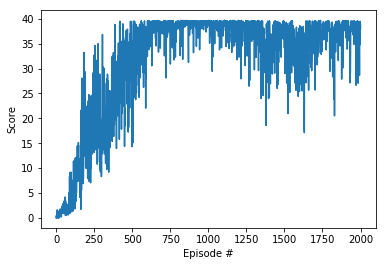

In [5]:
#agents = Agent(state_size=state_size_env, action_size=action_size_env, random_seed=0)[num_agents]
agents = [Agent(state_size=state_size_env, action_size=action_size_env, random_seed=i) for i in range(num_agents)]

def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_agents = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)    
        [agents[i].reset() for i in range(num_agents)]
    
        for t in range(max_t):
            actions = [agents[i].act(states[i],False) for i in range(num_agents)]
            actions = [np.clip(actions[i], -1, 1)  for i in range(num_agents)]
            #print(actions)
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            [agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i]) for i in range(num_agents)]
            states = next_states
            
            if np.any(dones):                                  # exit loop if episode finished
                break 
                
        scores_deque.append(scores)
        scores_agents.append(scores)
        #print(scores_agents)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(scores)), end="")
        if i_episode % 20 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')   
    return scores_agents

#scores = ddpg(n_episodes=10, max_t=130)


scores = ddpg()
print('scores len  {}'.format(len(scores)))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('AverageScore.png')






### 3. Run the Trained Agent

Now we can load the saved parameters for the trained agent and see the agent reaching the ball.

In [6]:
agents = [Agent(state_size=state_size_env, action_size=action_size_env, actor_chkpt_file="checkpoint_actor_final.pth", critic_chkpt_file="checkpoint_critic_final.pth", random_seed=0)]
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = [agents[i].act(states[i],False) for i in range(1)]
    actions = [np.clip(actions[i], -1, 1)  for i in range(1)]
    #print(actions)    
        
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 35.61999920383096


When finished, you can close the environment.

In [7]:
env.close()